In [ ]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import classification_report

In [ ]:
!pip install gdown -q

# ✅ Step 1: Download dataset using gdown (Handles Google Drive permissions correctly)
!gdown --id 1YRDuwJ2LNrWk7IpvVrWYz--VgLVjCmAv -O /content/dataset_blood_group.zip

# ✅ Step 2: Extract the dataset
import zipfile
import os

extract_path = "/content/dataset_blood_group"
with zipfile.ZipFile("/content/dataset_blood_group.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ✅ Step 3: Ensure correct dataset folder (handle nested structure)
subfolders = [f for f in os.listdir(extract_path) if os.path.isdir(os.path.join(extract_path, f))]
dataset_path = os.path.join(extract_path, subfolders[0]) if len(subfolders) == 1 else extract_path

# ✅ Step 4: List all class names (folders)
name_class = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
print("✅ Classes found in dataset:", name_class)


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1YRDuwJ2LNrWk7IpvVrWYz--VgLVjCmAv
From (redirected): https://drive.google.com/uc?id=1YRDuwJ2LNrWk7IpvVrWYz--VgLVjCmAv&confirm=t&uuid=d12cd73d-cee3-4cc9-b606-db676a33ffa7
To: /content/dataset_blood_group.zip
100% 77.8M/77.8M [00:01<00:00, 53.2MB/s]
✅ Classes found in dataset: ['AB+', 'A-', 'B-', 'O+', 'A+', 'AB-', 'B+', 'O-']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ✅ Define dataset path
dataset_path = "/content/dataset_blood_group/dataset"

# ✅ Dictionary to store image counts per blood group
label_counts = {}

# ✅ Loop through each blood group folder
for blood_group in sorted(os.listdir(dataset_path)):  # Sorting ensures order
    blood_group_path = os.path.join(dataset_path, blood_group)

    # ✅ Find all .BMP images in the folder
    bmp_files = glob.glob(os.path.join(blood_group_path, "*.BMP")) + \
                glob.glob(os.path.join(blood_group_path, "*.bmp"))

    # ✅ Store count in dictionary
    label_counts[blood_group] = len(bmp_files)

# ✅ Print counts for each blood group
print("📂 Blood group image counts:")
for group, count in label_counts.items():
    print(f"🔹 {group}: {count} images")

# ✅ Print total dataset size
total_images = sum(label_counts.values())
print("\n✅ Total dataset size:", total_images, "images")


📂 Blood group image counts:
🔹 A+: 1000 images
🔹 A-: 1000 images
🔹 AB+: 1000 images
🔹 AB-: 1000 images
🔹 B+: 1000 images
🔹 B-: 1000 images
🔹 O+: 1000 images
🔹 O-: 1000 images

✅ Total dataset size: 8000 images


📂 First 5 rows of dataset:
                                            Filepath Label
0  /content/dataset_blood_group/dataset/O+/cluste...    O+
1  /content/dataset_blood_group/dataset/O-/cluste...    O-
2  /content/dataset_blood_group/dataset/O+/cluste...    O+
3  /content/dataset_blood_group/dataset/AB+/clust...   AB+
4  /content/dataset_blood_group/dataset/AB+/clust...   AB+


<ipython-input-5-aaf24d30edad>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


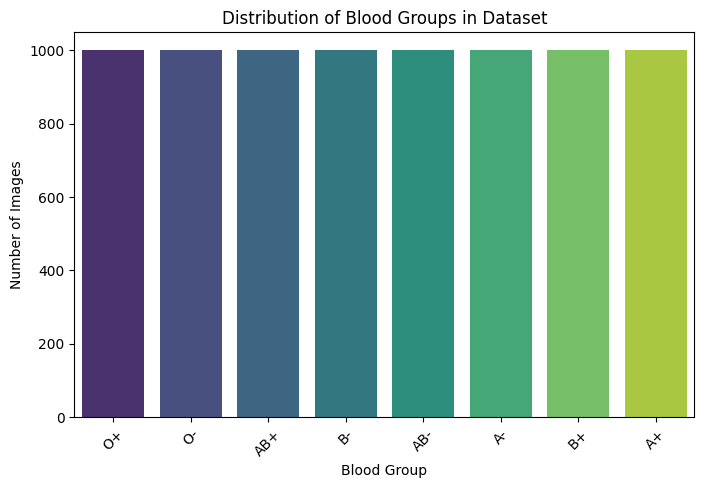


✅ Total dataset size: 8000 images


In [ ]:
# ✅ Step 1: Define dataset path
dataset_path = "/content/dataset_blood_group/dataset"

# ✅ Step 2: Collect all image paths & labels
filepaths = []
labels = []

for blood_group in sorted(os.listdir(dataset_path)):  # Sorting ensures order
    blood_group_path = os.path.join(dataset_path, blood_group)

    # ✅ Find all .BMP images in the folder
    bmp_files = glob.glob(os.path.join(blood_group_path, "*.BMP")) + \
                glob.glob(os.path.join(blood_group_path, "*.bmp"))

    # ✅ Store file paths & labels
    filepaths.extend(bmp_files)
    labels.extend([blood_group] * len(bmp_files))  # Assign label for each image

# ✅ Step 3: Create a DataFrame with file paths & labels
data = pd.DataFrame({"Filepath": filepaths, "Label": labels})

# ✅ Step 4: Shuffle dataset to ensure randomness
data = data.sample(frac=1).reset_index(drop=True)

# ✅ Step 5: Print first 5 rows to check data
print("📂 First 5 rows of dataset:")
print(data.head())

# ✅ Step 6: Count images per blood group
counts = data["Label"].value_counts()

# ✅ Step 7: Visualize the class distribution
plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.xlabel("Blood Group")
plt.ylabel("Number of Images")
plt.title("Distribution of Blood Groups in Dataset")
plt.xticks(rotation=45)
plt.show()

# ✅ Step 8: Print total dataset size
print(f"\n✅ Total dataset size: {len(filepaths)} images")


✅ Training set size: 6400 images
✅ Testing set size: 1600 images


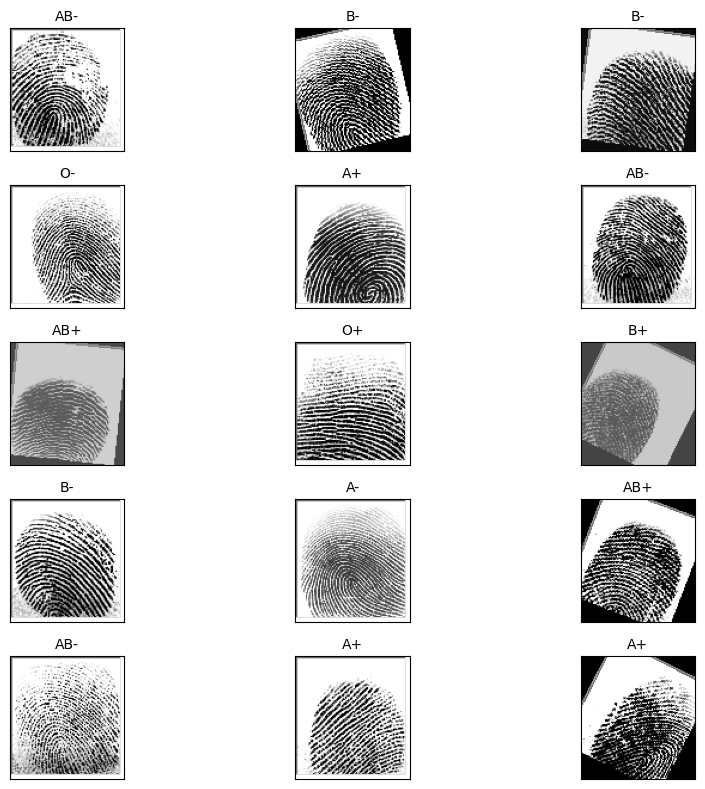


📊 Dataset Summary:
Label
A-     1000
A+     1000
B-     1000
AB-    1000
AB+    1000
O-     1000
O+     1000
B+     1000
Name: count, dtype: int64


In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

# ✅ Step 1: Define dataset path
dataset_path = "/content/dataset_blood_group/dataset"

# ✅ Step 2: Collect image paths & labels
filepaths = []
labels = []

for blood_group in sorted(os.listdir(dataset_path)):  # Sorting ensures order
    blood_group_path = os.path.join(dataset_path, blood_group)

    # ✅ Find all .BMP images in the folder
    bmp_files = glob.glob(os.path.join(blood_group_path, "*.BMP")) + \
                glob.glob(os.path.join(blood_group_path, "*.bmp"))

    # ✅ Store file paths & labels
    filepaths.extend(bmp_files)
    labels.extend([blood_group] * len(bmp_files))  # Assign label for each image

# ✅ Step 3: Create a DataFrame with file paths & labels
data = pd.DataFrame({"Filepath": filepaths, "Label": labels}).sample(frac=1).reset_index(drop=True)

# ✅ Step 4: Split dataset into training (80%) and testing (20%)
train, test = train_test_split(data, test_size=0.20, random_state=42, stratify=data["Label"])

print(f"✅ Training set size: {len(train)} images")
print(f"✅ Testing set size: {len(test)} images")

# ✅ Step 5: Visualize random images from the dataset
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

# Pick 15 random images
random_samples = data.sample(n=15, random_state=42).reset_index(drop=True)

for i, ax in enumerate(axes.flat):
    img_path = random_samples.Filepath[i]  # Get file path
    label = random_samples.Label[i]  # Get blood group label

    ax.imshow(plt.imread(img_path))  # Load and display image
    ax.set_title(label, fontsize=10)  # Set title as blood group label

plt.tight_layout()
plt.show()

# ✅ Print dataset stats
print("\n📊 Dataset Summary:")
print(data["Label"].value_counts())


In [ ]:
# Set up ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


valid_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)


Found 6400 validated image filenames belonging to 8 classes.
Found 1600 validated image filenames belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the base pre-trained model
pretrained_model = EfficientNetB0(
    input_shape=(224, 224, 3),  # EfficientNetB0 requires 224x224 input
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Unfreeze the last 20 layers for fine-tuning
for layer in pretrained_model.layers[-60:]:
    layer.trainable = True

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

x = Dense(512, activation="relu")(pretrained_model.output)  # Use output directly
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(8, activation="softmax")(x)

model = Model(inputs=pretrained_model.input, outputs=outputs)




model = Model(inputs=pretrained_model.input, outputs=outputs)

# Compile the model with a fine-tuning learning rate
model.compile(
    optimizer=Adam(learning_rate=0.000002),  # 🔻 Lower than before
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



# Callbacks to improve training
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model with callbacks
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=40,  # Increased epochs with early stopping safeguard
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 115s 200ms/step - accuracy: 0.1198 - loss: 3.4454 - val_accuracy: 0.1319 - val_loss: 2.2912 - learning_rate: 2.0000e-06
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.1212 - loss: 3.3732 - val_accuracy: 0.1294 - val_loss: 2.3412 - learning_rate: 2.0000e-06
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.1381 - loss: 3.2699 - val_accuracy: 0.1531 - val_loss: 2.3256 - learning_rate: 2.0000e-06
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.1409 - loss: 3.1683 - val_accuracy: 0.1950 - val_loss: 2.2072 - learning_rate: 2.0000e-06
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.1691 - loss: 3.1264 - val_accuracy: 0.2075 - val_loss: 2.1597 - learning_rate: 2.0000e-06
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.1647 - loss: 3.0777 - val_accuracy: 0.2250 - val_loss: 2.1044 - learning_rate: 2.0000e-06
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 1

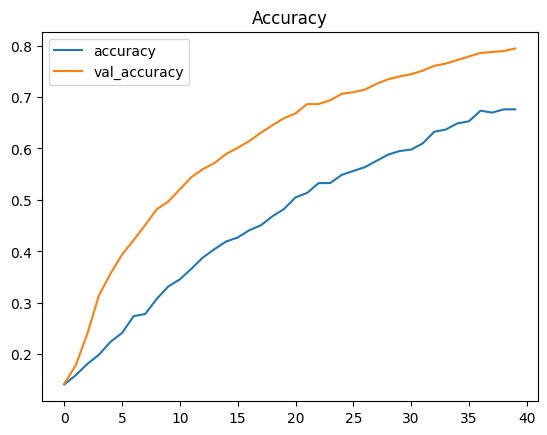

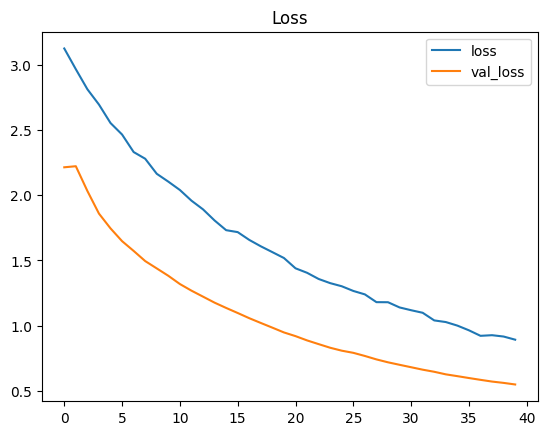

Test Loss: 0.55037
Test Accuracy: 79.44%
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step
              precision    recall  f1-score   support

          A+       0.83      0.89      0.86       200
          A-       0.80      0.66      0.72       200
         AB+       0.80      0.81      0.81       200
         AB-       0.76      0.77      0.77       200
          B+       0.75      0.81      0.78       200
          B-       0.83      0.85      0.84       200
          O+       0.79      0.79      0.79       200
          O-       0.79      0.78      0.78       200

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



In [ ]:
# Plot training history: accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# Plot training history: loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

# Evaluate the model on test data
results = model.evaluate(valid_gen, verbose=0)
print(f"Test Loss: {results[0]:.5f}")
print(f"Test Accuracy: {results[1]*100:.2f}%")

# Predict labels for test data
pred = model.predict(valid_gen)

pred = np.argmax(pred, axis=1)

# Map predicted labels
labels = train_gen.class_indices
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

# Compare predicted labels with true labels and print classification report
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
model.save("model_blood_group_detection.h5")

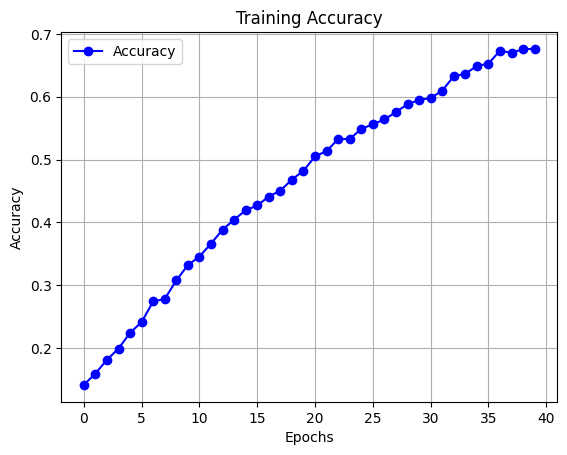

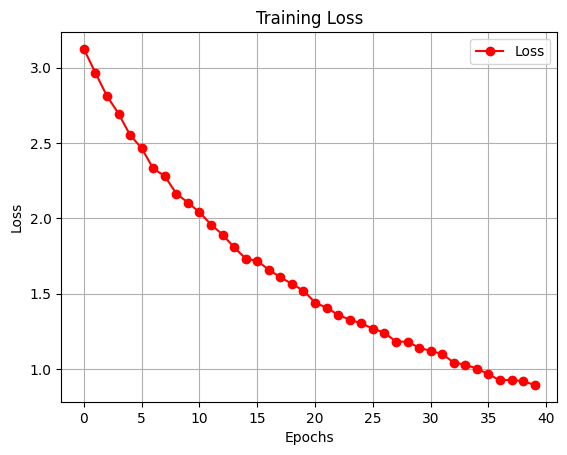

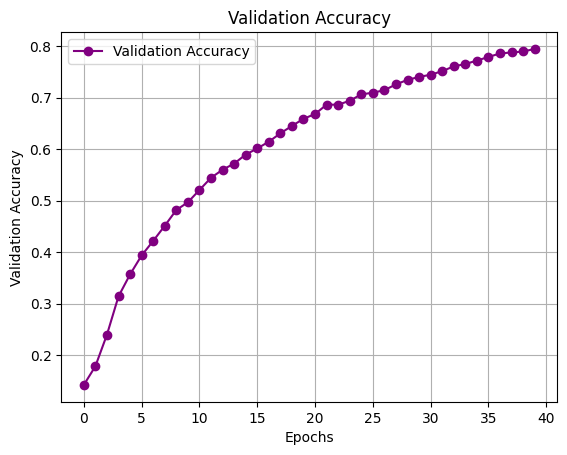

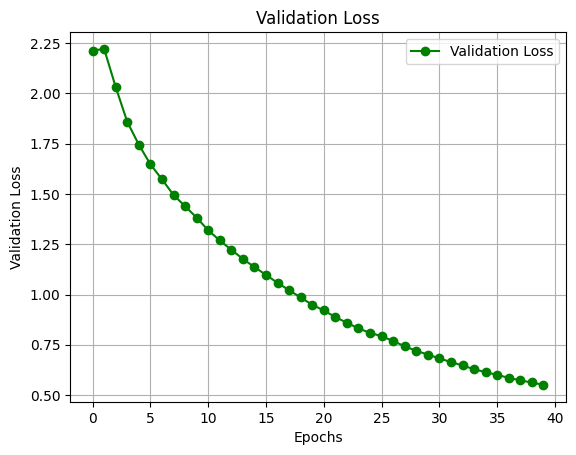

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()
plt.plot(history.history['loss'], marker='o', linestyle='-', color='red', label='Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()
plt.plot(history.history['val_accuracy'], marker='o', linestyle='-', color='purple', label='Validation Accuracy')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.grid()
plt.legend()
plt.show()
plt.plot(history.history['val_loss'], marker='o', linestyle='-', color='green', label='Validation Loss')
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.grid()
plt.legend()
plt.show()


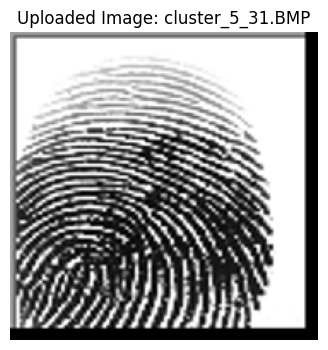

Prediction: AB+ - (45.45% Confidence)

🔵 Very Rare (4% of population)
🌍 Universal plasma donor
🩸 Can receive from all blood types (Universal recipient)
⚠️ Higher risk of blood clots and cardiovascular issues
🛡️ Strong immune tolerance and adaptation
🧠 Versatile and adaptable mindset
👥 John F. Kennedy, Marilyn Manson
🥗 Mediterranean diet with variety


Do you want to continue?


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import display, clear_output, HTML
from PIL import Image as PILImage
import io
from google.colab import files

# Load the model
model = load_model("model_blood_group_detection.h5")

# Blood group labels
labels = {0: 'A+', 1: 'A-', 2: 'AB+', 3: 'AB-', 4: 'B+', 5: 'B-', 6: 'O+', 7: 'O-'}

# Enhanced blood group info with more details
blood_group_info = {
    "A+": {
        "Rarity": "🟢 Common (30% of population)",
        "Compatibility": "🔄 Can donate to: A+, AB+",
        "Can Receive From": "🩸 Can receive from: A+, A-, O+, O-",
        "Vulnerability": "⚠️ Higher risk of heart disease and certain cancers",
        "Strengths": "🛡️ Best bacterial immunity response",
        "Personality": "🧠 Often analytical and organized",
        "Famous People": "👥 Emma Watson, Rihanna, Tom Cruise",
        "Diet Recommendation": "🥗 Mostly plant-based diet with lean protein"
    },
    "A-": {
        "Rarity": "🟠 Rare (6% of population)",
        "Compatibility": "🔄 Can donate to: A+, A-, AB+, AB-",
        "Can Receive From": "🩸 Can receive from: A-, O-",
        "Vulnerability": "⚠️ Sensitive to organ transplants and dietary changes",
        "Strengths": "🩸 Best for platelet donations and higher white blood cell count",
        "Personality": "🧠 Detail-oriented and reserved",
        "Famous People": "👥 Marilyn Monroe, Paul McCartney",
        "Diet Recommendation": "🥗 Low-fat diet with high-quality proteins"
    },
    "B+": {
        "Rarity": "🟢 Common (9% of population)",
        "Compatibility": "🔄 Can donate to: B+, AB+",
        "Can Receive From": "🩸 Can receive from: B+, B-, O+, O-",
        "Vulnerability": "⚠️ Higher diabetes risk and autoimmune disorders",
        "Strengths": "🍽️ Flexible digestive system, adaptable metabolism",
        "Personality": "🧠 Creative and independent thinkers",
        "Famous People": "👥 Jackie Chan, Leonardo DiCaprio",
        "Diet Recommendation": "🥗 Balanced diet with diverse food groups"
    },
    "B-": {
        "Rarity": "🔴 Rare (2% of population)",
        "Compatibility": "🔄 Can donate to: B+, B-, AB+, AB-",
        "Can Receive From": "🩸 Can receive from: B-, O-",
        "Vulnerability": "⚠️ Prone to infections and inflammatory conditions",
        "Strengths": "💪 Most resistant to fatigue and stress",
        "Personality": "🧠 Independent and decisive nature",
        "Famous People": "👥 Mila Kunis, Tom Selleck",
        "Diet Recommendation": "🥗 High-protein diet with regular meals"
    },
    "AB+": {
        "Rarity": "🔵 Very Rare (4% of population)",
        "Compatibility": "🌍 Universal plasma donor",
        "Can Receive From": "🩸 Can receive from all blood types (Universal recipient)",
        "Vulnerability": "⚠️ Higher risk of blood clots and cardiovascular issues",
        "Strengths": "🛡️ Strong immune tolerance and adaptation",
        "Personality": "🧠 Versatile and adaptable mindset",
        "Famous People": "👥 John F. Kennedy, Marilyn Manson",
        "Diet Recommendation": "🥗 Mediterranean diet with variety"
    },
    "AB-": {
        "Rarity": "🟣 Extremely Rare (1% of population)",
        "Compatibility": "🌍 Can donate to: AB+, AB-",
        "Can Receive From": "🩸 Can receive from: A-, B-, O-, AB-",
        "Vulnerability": "⚠️ Prone to low iron levels and anemia",
        "Strengths": "🔬 Best in tissue compatibility for transplants",
        "Personality": "🧠 Complex thinkers with dual perspectives",
        "Famous People": "👥 Mark Zuckerberg, Cindy Crawford",
        "Diet Recommendation": "🥗 Iron-rich foods with antioxidants"
    },
    "O+": {
        "Rarity": "🟢 Most Common (37% of population)",
        "Compatibility": "🔄 Can donate to: O+, A+, B+, AB+",
        "Can Receive From": "🩸 Can receive from: O+, O-",
        "Vulnerability": "⚠️ Higher risk of ulcers and digestive disorders",
        "Strengths": "💪 Universal donor and robust immune system",
        "Personality": "🧠 Natural leaders and resilient characters",
        "Famous People": "👥 Queen Elizabeth II, Bill Clinton",
        "Diet Recommendation": "🥗 High-protein, low-carb diet with regular meals"
    },
    "O-": {
        "Rarity": "🔴 Rarest (7% of population)",
        "Compatibility": "🌍 Universal blood donor (can donate to all blood types)",
        "Can Receive From": "🩸 Can receive from: O- only",
        "Vulnerability": "⚠️ Prone to low blood pressure and stress-related issues",
        "Strengths": "🛡️ Best emergency donor, highly valued in medical settings",
        "Personality": "🧠 Intuitive and determined individuals",
        "Famous People": "👥 Charlie Chaplin, Paul Newman",
        "Diet Recommendation": "🥗 Balanced diet rich in iron and vitamins"
    }
}

def handle_yes():
    clear_output()
    predict_blood_group()

def handle_no():
    clear_output()
    display(HTML("<p style='font-weight: bold; font-size: 16px; color: #4CAF50;'>Thank you for using the Blood Group Detection App!</p>"))

# Create button widgets that work in Colab
yes_button = widgets.Button(description="Yes", button_style="success")
no_button = widgets.Button(description="No", button_style="danger")

# Assign button handlers
yes_button.on_click(lambda b: handle_yes())
no_button.on_click(lambda b: handle_no())

# Function to predict blood group from image
def predict_blood_group():
    # Display upload status
    display(HTML("<p style='font-weight: bold; color: #2196F3;'>Uploading image...</p>"))

    # Upload using Colab's file uploader
    uploaded = files.upload()

    if not uploaded:
        display(HTML("<p style='color: red;'>No file was uploaded. Please try again.</p>"))
        predict_blood_group()
        return

    # Get the first file
    file_name = next(iter(uploaded))
    img_bytes = uploaded[file_name]

    # Display processing status
    clear_output()
    display(HTML("<p style='font-weight: bold; color: #2196F3;'>Predicting blood group... Please wait.</p>"))

    # Load and preprocess the image
    img = PILImage.open(io.BytesIO(img_bytes)).convert("RGB")
    img = img.resize((224, 224))  # Ensure correct resizing

    # Convert to array
    x = np.array(img)  # Convert directly to NumPy array
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Ensure shape is correct
    print(f"Image Shape After Preprocessing: {x.shape}")  # Should be (1, 224, 224, 3)

    # Apply EfficientNet preprocessing
    x = preprocess_input(x)  # Normalize pixel values


    # Make prediction
    result = model.predict(x)
    print("Raw Model Output:", result)  # Print probability scores for each class

    predicted_class = np.argmax(result)
    predicted_label = labels[predicted_class]
    confidence = result[0][predicted_class] * 100  # Confidence percentage

    # Clear outputs
    clear_output()

    # Display image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Uploaded Image: {file_name}")
    plt.axis('off')
    plt.show()

    # Display results with each item on a new line
    print(f"Prediction: {predicted_label} - ({confidence:.2f}% Confidence)\n")

    # Display each piece of info on a new line
    info = blood_group_info[predicted_label]
    for key, value in info.items():
        print(f"{value}")

    # Add spacing before the continue question
    print("\n\nDo you want to continue?")
    # Print raw model output to check probability distribution
    #print("Raw Model Output:", result)

    # Print all class probabilities for verification
    #for i, prob in enumerate(result[0]):
      #print(f"{labels[i]}: {prob*100:.2f}%")
    display(widgets.HBox([yes_button, no_button]))

# Start the application
predict_blood_group()